# Exploring Genre Classification in Literature: A Comparative Analysis of Prediction Models

### In this study, we delve into the realm of genre classification in literature using various predictive models. Our research explores the effectiveness of different machine learning algorithms in classifying literary works into distinct genres such as fantasy, fiction, nonfiction, romance, and more. By employing techniques like TF-IDF vectorization and model evaluation metrics, we compare the performance of models including Support Vector Machines, Naive Bayes, Random Forest, and Logistic Regression. Through this comparative analysis, we aim to unravel insights into the most effective methodologies for genre classification in literature, shedding light on the nuances and challenges inherent in predicting literary genres using computational techniques.

In [89]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from wordcloud import WordCloud
from collections import Counter

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [80]:
# Load the data

books_g = pd.read_csv('books_final.csv')
books_g.head()

,title,author,stars,ratings,reviews,synopsis,genre,version,price,number_of_pages,book_format,published_date,published_year,num_books_author,followers_author
0,The Hunger Games,SUZANNE COLLINS,4.34,8601389,216773,"Could you survive on your own in the wild, wit...",Young Adult,Kindle Unlimited,0.00,374,Hardcover,"September 14, 2008",2008,72,997000
1,Harry Potter and the Order of the Phoenix,J.K. ROWLING,4.50,3359608,62879,Harry Potter is about to start his fifth year ...,Young Adult,Kindle Unlimited,0.00,912,Paperback,"June 21, 2003",2003,535,225000
2,Pride and Prejudice,JANE AUSTEN,4.29,4238613,113179,"Since its immediate success in 1813, Pride and...",Classics,Kindle,2.99,279,Paperback,"January 28, 1813",1813,4124,663000
3,To Kill a Mockingbird,HARPER LEE,4.26,6079471,116454,The unforgettable novel of a childhood in a sl...,Classics,Kindle,13.99,323,Paperback,"July 11, 1960",1960,70,135000
4,The Book Thief,MARKUS ZUSAK,4.39,2538383,143787,Librarian's note: An alternate cover edition c...,Historical,Kindle,10.99,592,Hardcover,"September 1, 2005",2005,23,392000


In [81]:
books_pred_g = books_g[['title', 'genre', 'synopsis']].copy()
books_pred_g.head()

,title,genre,synopsis
0,The Hunger Games,Young Adult,"Could you survive on your own in the wild, wit..."
1,Harry Potter and the Order of the Phoenix,Young Adult,Harry Potter is about to start his fifth year ...
2,Pride and Prejudice,Classics,"Since its immediate success in 1813, Pride and..."
3,To Kill a Mockingbird,Classics,The unforgettable novel of a childhood in a sl...
4,The Book Thief,Historical,Librarian's note: An alternate cover edition c...


In [82]:
books_pred_g.genre.value_counts()

genre
Fantasy                  1371
Fiction                  1305
Nonfiction                772
Young Adult               517
Romance                   433
Mystery/Thriller          432
Historical                380
Classics                  360
Horror                    321
Science Fiction           255
Literature                155
Paranormal                153
Children                   87
Religion/Spirituality      72
Poetry                     57
Contemporary               43
Personal Development       39
Manga                      23
Comics                     21
Humor                      17
Cultural                   14
Erotica                     8
New Adult                   7
Gaming                      1
Name: count, dtype: int64

In [83]:
genre_counts = books_pred_g['genre'].value_counts()

# Get genres with counts over 80
selected_genres = genre_counts[genre_counts > 100].index.tolist()

# Filter the original DataFrame based on selected genres
new_pred = books_pred_g[books_pred_g['genre'].isin(selected_genres)]

new_pred

,title,genre,synopsis
0,The Hunger Games,Young Adult,"Could you survive on your own in the wild, wit..."
1,Harry Potter and the Order of the Phoenix,Young Adult,Harry Potter is about to start his fifth year ...
2,Pride and Prejudice,Classics,"Since its immediate success in 1813, Pride and..."
3,To Kill a Mockingbird,Classics,The unforgettable novel of a childhood in a sl...
4,The Book Thief,Historical,Librarian's note: An alternate cover edition c...
...,...,...,...
6837,The Rice Mother,Historical,"Nothing in Lakshmi's childhood, running carefr..."
6838,Imperium,Historical,"When Tiro, the confidential secretary (and sla..."
6839,The Dangerous Days of Daniel X,Young Adult,He was born with great power\nThe greatest sup...
6841,Family Matters,Fiction,Rohinton Mistry’s enthralling novel is at once...


In [84]:
new_pred.genre.value_counts()

genre
Fantasy             1371
Fiction             1305
Nonfiction           772
Young Adult          517
Romance              433
Mystery/Thriller     432
Historical           380
Classics             360
Horror               321
Science Fiction      255
Literature           155
Paranormal           153
Name: count, dtype: int64

In [85]:
new_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6454 entries, 0 to 6842
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     6454 non-null   object
 1   genre     6454 non-null   object
 2   synopsis  6454 non-null   object
dtypes: object(3)
memory usage: 201.7+ KB


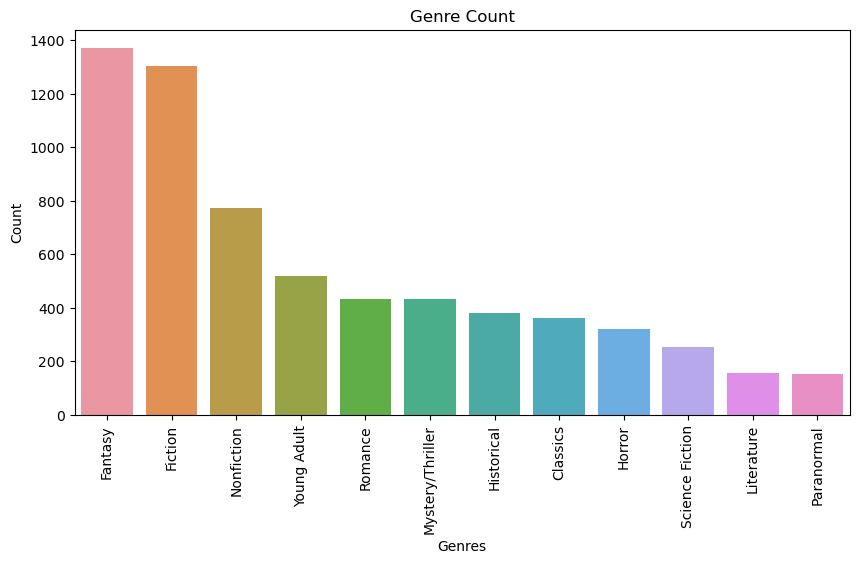

In [91]:
#Generating a countplot for genre

plt.figure(figsize=(10,5))
sns.barplot(x=new_pred['genre'].value_counts().index,y=new_pred['genre'].value_counts())
plt.title('Genre Count')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90);

# Text Preprocessing

- Convert to Lowercase
- Remove punctuations
- Remove stopwords
- Stemming/Lemmatization

In [92]:
# Function to convert the combined text to lowercase.
def lowercase(text):
    text=text.lower()
    return text

In [93]:
# Function to remove the punctuations from the combined text.
punc=string.punctuation

def removepunc(text):
    return text.translate(str.maketrans('','',punc)) 

In [94]:
#Even after the previous operations on text,it still contains a lot of words that do not add any context to language processing in NLP which are known as stopwords. 
#Thus it is necessary to filter these stopwords out of the required text using the below function
def remove_sw(text):
    new_list=[]
    # Tokenization is breaking complex data into smaller units called tokens. It can be done by splitting paragraphs into sentences and sentences into words.
    words=word_tokenize(text)
    sws=stopwords.words('english')
    for word in words:
        if word not in sws:
            new_list.append(word)
    
    return ' '.join(new_list)

In [95]:
# Function to perform stemming on the combined text
def stem_text(text):
    new_list=[]
    stemmer=PorterStemmer()
    words=word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))
    
    return ' '.join(new_list)

In [96]:
#Combining the title and summary column for further text preprocessing

new_pred['title_synopsis']=new_pred['title'] + ' ' + new_pred['synopsis']
new_pred.head()

C:\Users\diana\AppData\Local\Temp\ipykernel_34412\1794693528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pred['title_synopsis']=new_pred['title'] + ' ' + new_pred['synopsis']


,title,genre,synopsis,title_synopsis
0,The Hunger Games,Young Adult,"Could you survive on your own in the wild, wit...",The Hunger Games Could you survive on your own...
1,Harry Potter and the Order of the Phoenix,Young Adult,Harry Potter is about to start his fifth year ...,Harry Potter and the Order of the Phoenix Harr...
2,Pride and Prejudice,Classics,"Since its immediate success in 1813, Pride and...",Pride and Prejudice Since its immediate succes...
3,To Kill a Mockingbird,Classics,The unforgettable novel of a childhood in a sl...,To Kill a Mockingbird The unforgettable novel ...
4,The Book Thief,Historical,Librarian's note: An alternate cover edition c...,The Book Thief Librarian's note: An alternate ...


In [97]:
#Finally we run the above defined funtions on the column Combined_Text
new_pred['title_synopsis']=new_pred['title_synopsis'].apply(lowercase)
new_pred['title_synopsis']=new_pred['title_synopsis'].apply(removepunc)
new_pred['title_synopsis']=new_pred['title_synopsis'].apply(remove_sw)
new_pred['title_synopsis']=new_pred['title_synopsis'].apply(stem_text)

new_pred.head()

C:\Users\diana\AppData\Local\Temp\ipykernel_34412\3426462043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pred['title_synopsis']=new_pred['title_synopsis'].apply(lowercase)
C:\Users\diana\AppData\Local\Temp\ipykernel_34412\3426462043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pred['title_synopsis']=new_pred['title_synopsis'].apply(removepunc)
C:\Users\diana\AppData\Local\Temp\ipykernel_34412\3426462043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,title,genre,synopsis,title_synopsis
0,The Hunger Games,Young Adult,"Could you survive on your own in the wild, wit...",hunger game could surviv wild everi one make s...
1,Harry Potter and the Order of the Phoenix,Young Adult,Harry Potter is about to start his fifth year ...,harri potter order phoenix harri potter start ...
2,Pride and Prejudice,Classics,"Since its immediate success in 1813, Pride and...",pride prejudic sinc immedi success 1813 pride ...
3,To Kill a Mockingbird,Classics,The unforgettable novel of a childhood in a sl...,kill mockingbird unforgett novel childhood sle...
4,The Book Thief,Historical,Librarian's note: An alternate cover edition c...,book thief librarian note altern cover edit fo...


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_pred['title_synopsis'], new_pred['genre'], test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the model (example with RandomForestClassifier)
rf_classifier = RandomForestClassifier(n_estimators=300)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.5096824167312161
                  precision    recall  f1-score   support

        Classics       0.67      0.08      0.15        71
         Fantasy       0.50      0.90      0.64       264
         Fiction       0.42      0.71      0.53       279
      Historical       0.75      0.04      0.08        74
          Horror       0.75      0.11      0.19        56
      Literature       1.00      0.06      0.12        31
Mystery/Thriller       0.63      0.43      0.51        94
      Nonfiction       0.65      0.70      0.67       158
      Paranormal       0.00      0.00      0.00        31
         Romance       0.70      0.24      0.36        88
 Science Fiction       0.75      0.35      0.47        52
     Young Adult       0.42      0.18      0.26        93

        accuracy                           0.51      1291
       macro avg       0.60      0.32      0.33      1291
    weighted avg       0.56      0.51      0.45      1291



C:\Users\diana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\diana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\diana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# "Book Genre Prediction from Synopsis"

In [129]:
#book_1 = The Fortress of Solitude - Jonathan Lethem - Nonfiction

synopsis_1 = '''This is the story of two boys, Dylan Ebdus and Mingus Rude. They live in Brooklyn and are friends and 
neighbours; but since Dylan is white and Mingus is black, their friendship is not simple.

This is the story of 1970s America, a time when the simplest decisions—what music you listen to, whether to speak to 
the kid in the seat next to you, whether to give up your lunch money—are laden with potential political, 
social and racial disaster. This is also the story of 1990s America, when nobody cared anymore.

This is the story of what would happen if two teenaged boys obsessed with comic book heroes actually had superpowers: 
they would screw up their lives.'''

In [100]:
new_synopsis = synopsis_1

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Nonfiction']


In [101]:
#book_2 = Around the World in Eighty Days - Jules Verne - Fiction

synopsis_2 = '''One night in the reform club, Phileas Fogg bets his companions that he can travel across the globe in just
eighty days. Breaking the well-established routine of his daily life, he immediately sets off for Dover with his astonished
valet Passepartout. Passing through exotic lands and dangerous locations, they seize whatever transportation is at 
hand—whether train or elephant—overcoming set-backs and always racing against the clock.'''

In [102]:
new_synopsis = synopsis_2

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Fiction']


In [103]:
#book_3 = Junkyard Dogs - Craig Johnson - Mystery

synopsis_3 = '''A missing thumb and dead developers are only the beginning for Sheriff Walt Longmire

It's a volatile new economy in Durant, Wyoming, where the owners of a multi-million dollar development of ranchettes 
want to get rid of the adjacent junk-yard. When a severed thumb is discovered in the yard, conflicts erupt, and Walt 
Longmire, his trusty companion Dog, life-long friend Henry Standing Bear, and deputies Santiago Saizarbitoria and 
Victoria Moretti find themselves in a small town that feels more and more like a high plains pressure cooker.

Craig Johnson's award-winning Walt Longmire mysteries continue to find new fans, and Junkyard Dogs is sure to create 
many more devotees. The sixth book in the series is filled with Johnson's signature blend of wisecracks, Western justice, 
and page-turning plot twists, as the beloved sheriff finds himself star-deep in the darker aspects of human nature, 
in a story of love, laughs, death, and derelict automobiles.'''

In [104]:
new_synopsis = synopsis_3

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Fiction']


In [105]:
#book_4 = Mossflower - Brian Jacques - Fantasy

synopsis_4 = '''The thrilling prequel to "Redwall". The clever and greedy wildcat Tsarmina becomes ruler of all 
Mossflower Woods and is determined to govern the peaceful woodlanders with an iron paw. The brave mouse Martin 
and quick-talking mouse thief Gonff meet in the depths of Kotir Castle's dungeon. The two escape and resolve to end 
Tsarmina's tyrannical rule. Joined by Kinny the mole, Martin and Gonff set off on a dangerous quest for Salamandastron, 
where they are convinced that their only hope, Boar the Fighter, still lives.'''

In [106]:
new_synopsis = synopsis_4

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Fantasy']


In [107]:
#book_5 = I Can Read With My Eyes Shut! - Dr. Seuss - Fiction

synopsis_5 = '''“The more that you read, the more things you will know. The more you learn, the more places you’ll go”. 
In this delightful book, Dr. Seuss celebrates the joys of reading, encouraging young children to take pride in their 
budding reading abilities. With his unique combination of hilarious stories, zany pictures and riotous rhymes, Dr. Seuss 
has been delighting young children and helping them learn to read for over fifty years. Creator of the wonderfully 
anarchic Cat in the Hat, and ranked among the UK's top ten favourite children's authors, Seuss is firmly established as a 
global best-seller, with nearly half a billion books sold worldwide. As the first step in a major rebrand programme, 
HarperCollins is relaunching 17 of Dr. Seuss's best-selling books, including such perennial favourites as The Cat in the 
Hat, Green Eggs and Ham and Fox in Socks. In response to consumer demand, the bright new cover designs incorporate much 
needed guidance on reading levels, with the standard paperbacks divided into three reading strands – Blue Back Books 
for parents to share with young children, Green Back Books for budding readers to tackle on their own, 
and Yellow Back Books for older, more fluent readers to enjoy. I Can Read With My Eyes Shut belongs to the Green Back Book 
range.'''

In [108]:
new_synopsis = synopsis_5

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Fiction']


In [109]:
#book_6 = The Host - Stephenie Meyer - Young Adult

synopsis_6 = '''Melanie Stryder refuses to fade away. The earth has been invaded by a species that take over the minds 
of human hosts while leaving their bodies intact. Wanderer, the invading "soul" who has been given Melanie's body, 
didn't expect to find its former tenant refusing to relinquish possession of her mind.

As Melanie fills Wanderer's thoughts with visions of Jared, a human who still lives in hiding, Wanderer begins to yearn 
for a man she's never met. Reluctant allies, Wanderer and Melanie set off to search for the man they both love.'''

In [110]:
new_synopsis = synopsis_6

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Young Adult']


In [111]:
#book_7 = Bridge to Terabithia - Katherine Paterson - Fiction

synopsis_7 = '''Jess Aarons has been practicing all summer so he can be the fastest runner in the fifth grade. 
And he almost is, until the new girl in school, Leslie Burke, outpaces him. The two become fast friends and spend most 
days in the woods behind Leslie's house, where they invent an enchanted land called Terabithia. One morning, 
Leslie goes to Terabithia without Jess and a tragedy occurs. It will take the love of his family and the strength that
Leslie has given him for Jess to be able to deal with his grief.'''

In [112]:
new_synopsis = synopsis_7

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Fiction']


In [113]:
#book_8 = Hopeless - Colleen Hoover - Romance

synopsis_8 = '''That’s what seventeen-year-old Sky realizes after she meets Dean Holder. A guy with a reputation that 
rivals her own and an uncanny ability to invoke feelings in her she’s never had before. He terrifies her and captivates 
her all in the span of just one encounter, and something about the way he makes her feel sparks buried memories from a 
past that she wishes could just stay buried.

Sky struggles to keep him at a distance knowing he’s nothing but trouble, but Holder insists on learning everything 
about her. After finally caving to his unwavering pursuit, Sky soon finds that Holder isn’t at all who he’s been 
claiming to be. When the secrets he’s been keeping are finally revealed, every single facet of Sky’s life will change 
forever.'''

In [114]:
new_synopsis = synopsis_8

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Romance']


In [115]:
#book_9 = Bared to You - Sylvia Day - Romance

synopsis_9 = '''Gideon Cross came into my life like lightning in the darkness...

He was beautiful and brilliant, jagged and white-hot. I was drawn to him as I'd never been to anything or anyone in my life.
I craved his touch like a drug, even knowing it would weaken me. I was flawed and damaged, and he opened those cracks 
in me so easily...

Gideon knew. He had demons of his own. And we would become the mirrors that reflected each other's most private worlds...
and desires.

The bonds of his love transformed me, even as I prayed that the torment of our pasts didn't tear us apart...'''

In [116]:
new_synopsis = synopsis_9

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Romance']


In [117]:
#book_10 = And Then There Were None - Agatha Christie - Mystery

synopsis_10 = '''First, there were ten—a curious assortment of strangers summoned as weekend guests to a little private 
island off the coast of Devon. Their host, an eccentric millionaire unknown to all of them, is nowhere to be found. 
All that the guests have in common is a wicked past they're unwilling to reveal—and a secret that will seal their fate. 
For each has been marked for murder. A famous nursery rhyme is framed and hung in every room of the mansion:

"Ten little boys went out to dine; One choked his little self and then there were nine. Nine little boys sat up very late; 
One overslept himself and then there were eight. Eight little boys traveling in Devon; One said he'd stay there then there
were seven. Seven little boys chopping up sticks; One chopped himself in half and then there were six. Six little boys 
playing with a hive; A bumblebee stung one and then there were five. Five little boys going in for law; One got in 
Chancery and then there were four. Four little boys going out to sea; A red herring swallowed one and then there were three.
Three little boys walking in the zoo; A big bear hugged one and then there were two. Two little boys sitting in the sun; 
One got frizzled up and then there was one. One little boy left all alone; He went out and hanged himself and then there 
were none."

When they realize that murders are occurring as described in the rhyme, terror mounts. One by one they fall prey. 
Before the weekend is out, there will be none. Who has choreographed this dastardly scheme? And who will be left to tell 
the tale? Only the dead are above suspicion.'''

In [118]:
new_synopsis = synopsis_10

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Mystery/Thriller']


In [119]:
#book_11 = The Maltese Falcon - Dashiell Hammett - Mystery

synopsis_11 = '''Sam Spade is hired by the fragrant Miss Wonderley to track down her sister, who has eloped with a 
louse called Floyd Thursby. But Miss Wonderley is in fact the beautiful and treacherous Brigid O'Shaughnessy, 
and when Spade's partner Miles Archer is shot while on Thursby's trail, Spade finds himself both hunter and hunted: 
can he track down the jewel-encrusted bird, a treasure worth killing for, before the Fat Man finds him?'''

In [120]:
new_synopsis = synopsis_11

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Mystery/Thriller']


In [121]:
#book_12 = Hamlet - William Shakespeare - Classics

synopsis_12 = '''Among Shakespeare's plays, "Hamlet" is considered by many his masterpiece. Among actors, the role of 
Hamlet, Prince of Denmark, is considered the jewel in the crown of a triumphant theatrical career. Now Kenneth Branagh 
plays the leading role and co-directs a brillant ensemble performance. Three generations of legendary leading actors, 
many of whom first assembled for the Oscar-winning film "Henry V", gather here to perform the rarely heard complete version
of the play. This clear, subtly nuanced, stunning dramatization, presented by The Renaissance Theatre Company in 
association with "Bbc" Broadcasting, features such luminaries as Sir John Gielgud, Derek Jacobi, Emma Thompson and 
Christopher Ravenscroft. It combines a full cast with stirring music and sound effects to bring this magnificent 
Shakespearen classic vividly to life. Revealing new riches with each listening, this production of "Hamlet" is an 
invaluable aid for students, teachers and all true lovers of Shakespeare - a recording to be treasured for decades to come.'''


In [122]:
new_synopsis = synopsis_12

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Classics']


In [123]:
#book_13 = Sense and Sensibility - Jane Austen - Classics

synopsis_13 = ''''The more I know of the world, the more am I convinced that I shall never see a man whom I can really love.
I require so much!'

Marianne Dashwood wears her heart on her sleeve, and when she falls in love with the dashing but unsuitable John Willoughby
she ignores her sister Elinor's warning that her impulsive behaviour leaves her open to gossip and innuendo. 
Meanwhile Elinor, always sensitive to social convention, is struggling to conceal her own romantic disappointment, 
even from those closest to her. Through their parallel experience of love—and its threatened loss—the sisters learn 
that sense must mix with sensibility if they are to find personal happiness in a society where status and money govern 
the rules of love.'''

In [124]:
new_synopsis = synopsis_13

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Classics']


In [125]:
#book_14 = Goodnight Moon - Margaret Wise Brown - Fantasy 

synopsis_14 = '''In a great green room, tucked away in bed, is a little bunny. "Goodnight room, goodnight moon." 
And to all the familiar things in the softly lit room -- to the picture of the three little bears sitting on chairs, 
to the clocks and his socks, to the mittens and the kittens, to everything one by one -- the little bunny says goodnight.'''


In [126]:
new_synopsis = synopsis_14

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Fantasy']


In [127]:
#book_15 = Little House on the Prairie - Laura Ingalls Wilder - Classics

synopsis_15 = '''Meet Laura Ingalls, the little girl who would grow up to write the Little House books. Pa Ingalls 
decides to sell the little log house, and the family sets out for Indian country! They travel from Wisconsin to Kansas, 
and there, finally, Pa builds their little house on the prairie. Sometimes farm life is difficult, even dangerous, 
but Laura and her family are kept busy and are happy with the promise of their new life on the prairie.'''

In [128]:
new_synopsis = synopsis_15

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Classics']


In [130]:
#book_16 = A Short History of Nearly Everything - Bill Bryson - Nonfiction

synopsis_16 = '''Bill Bryson describes himself as a reluctant traveller, but even when he stays safely at home 
he can't contain his curiosity about the world around him. "A Short History of Nearly Everything" is his quest 
to understand everything that has happened from the Big Bang to the rise of civilisation - how we got from there, 
being nothing at all, to here, being us. The ultimate eye-opening journey through time and space, revealing the world 
in a way most of us have never seen it before.'''

In [131]:
new_synopsis = synopsis_16

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Nonfiction']


In [132]:
#book_17 = The Immortal Life of Henrietta Lacks - Rebecca Skloot - Nonfiction

synopsis_17 = '''Her name was Henrietta Lacks, but scientists know her as HeLa. She was a poor Southern tobacco farmer
who worked the same land as her enslaved ancestors, yet her cells—taken without her knowledge—became one of the most 
important tools in medicine. The first “immortal” human cells grown in culture, they are still alive today, though she 
has been dead for more than sixty years. If you could pile all HeLa cells ever grown onto a scale, they’d weigh more 
than 50 million metric tons—as much as a hundred Empire State Buildings. HeLa cells were vital for developing the polio 
vaccine; uncovered secrets of cancer, viruses, and the atom bomb’s effects; helped lead to important advances like in 
vitro fertilization, cloning, and gene mapping; and have been bought and sold by the billions.

Yet Henrietta Lacks remains virtually unknown, buried in an unmarked grave.

Now Rebecca Skloot takes us on an extraordinary journey, from the “colored” ward of Johns Hopkins Hospital in the 1950s 
to stark white laboratories with freezers full of HeLa cells; from Henrietta’s small, dying hometown of Clover, Virginia — 
a land of wooden quarters for enslaved people, faith healings, and voodoo — to East Baltimore today, where her children 
and grandchildren live and struggle with the legacy of her cells.

Henrietta’s family did not learn of her “immortality” until more than twenty years after her death, when scientists 
investigating HeLa began using her husband and children in research without informed consent. And though the cells 
had launched a multimillion-dollar industry that sells human biological materials, her family never saw any of the profits. As Rebecca Skloot so brilliantly shows, the story of the Lacks family — past and present — is inextricably connected to the history of experimentation on African Americans, the birth of bioethics, and the legal battles over whether we control the stuff we are made of.

Over the decade it took to uncover this story, Rebecca became enmeshed in the lives of the Lacks family—especially 
Henrietta’s daughter Deborah, who was devastated to learn about her mother’s cells. She was consumed with questions: 
Had scientists cloned her mother? Did it hurt her when researchers infected her cells with viruses and shot them into space?
What happened to her sister, Elsie, who died in a mental institution at the age of fifteen? And if her mother was so 
important to medicine, why couldn’t her children afford health insurance?'''

In [133]:
new_synopsis = synopsis_17

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Nonfiction']


In [134]:
#book_18 = The Other Boleyn Girl - Philippa Gregory - Historical

synopsis_18 ='''When Mary Boleyn comes to court as an innocent girl of fourteen, she catches the eye of Henry VIII. 
Dazzled, Mary falls in love with both her golden prince and her growing role as unofficial queen. However, she soon 
realises just how much she is a pawn in her family's ambitious plots as the king's interest begins to wane and she is 
forced to step aside for her best friend and rival: her sister, Anne. Then Mary knows that she must defy her family 
and her king and take fate into her own hands.

A rich and compelling novel of love, sex, ambition, and intrigue, The Other Boleyn Girl introduces a woman of extraordinary
determination and desire who lived at the heart of the most exciting and glamourous court in Europe and survived by 
following her heart.'''

In [135]:
new_synopsis = synopsis_18

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Historical']


In [142]:
#book_19 = Eye of the Needle - Ken Follett - Fiction

synopsis_19 = '''One enemy spy knows the secret to the Allies' greatest deception, a brilliant aristocrat and ruthless 
assassin -- code name: "The Needle" -- who holds the key to ultimate Nazi victory.

Only one person stands in his way: a lonely Englishwoman on an isolated island, who is beginning to love the killer who 
has mysteriously entered her life.

All will come to a terrifying conclusion in Ken Follett's unsurpassed and unforgettable masterwork of suspense, intrigue,
and the dangerous machinations of the human heart.'''

In [143]:
new_synopsis = synopsis_19

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Fiction']


In [146]:
#book_20 = A Monstrous Regiment of Women - Laurie R. King - Mystery

synopsis_20 = '''A Monstrous Regiment of Women continues Mary Russell's adventures as a worthy student of the famous 
detective Sherlock Holmes and as an ever more skilled sleuth in her own right. Looking for respite in London after a 
stupefying visit from relatives, Mary encounters a friend from Oxford. The young woman introduces Mary to her current 
enthusiasm, a strange and enigmatic woman named Margery Childe, who leads something called "The New Temple of God." 
It seems to be a charismatic sect involved in the post-World War I suffrage movement, with a feminist slant on Christianity.
Mary is curious about the woman, and intrigued. Is the New Temple a front for something more sinister? When a series of 
murders claims members of the movement's wealthy young female volunteers and principal contributors, Mary, with Holmes 
in the background, begins to investigate. Things become more desperate than either of them expected as Mary's search 
plunges her into the worst danger she has yet faced.'''

In [147]:
new_synopsis = synopsis_20

# Preprocess the new synopsis
new_synopsis = lowercase(new_synopsis)
new_synopsis = removepunc(new_synopsis)
new_synopsis = remove_sw(new_synopsis)
new_synopsis = stem_text(new_synopsis)

# Vectorize the new synopsis using the pre-trained TF-IDF vectorizer
new_synopsis_vectorized = tfidf_vectorizer.transform([new_synopsis])

# Make predictions using the pre-trained RandomForestClassifier model
predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Mystery/Thriller']


## Conclusion:

In this notebook, we developed a machine learning model to predict book genres based on their synopses. Using a Random Forest Classifier and TF-IDF vectorization, we achieved an accuracy of aprox. 51%. The model demonstrated effectiveness by correctly predicting 19 out of 20 book genres, indicating its potential utility in assisting with genre classification tasks in the literary domain. Further improvements could involve exploring different text preprocessing techniques, adjusting model parameters, or experimenting with alternative algorithms to enhance prediction performance.